In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Step 1: Load the CSV file with the new "on_bad_lines" parameter
data_file = "./DB Seasonality Chart.csv"

try:
    # Use on_bad_lines to skip problematic rows
    df = pd.read_csv(data_file, on_bad_lines='skip')  # Skips lines with issues
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

# Preview the data after loading
print("Data Preview:")
print(df.head())


Data Preview:
                        sep=,
NaN NaN NaN NaN NaN NaN    DB


In [11]:
# Step 1: Load the CSV file, adjusting for header issues
data_file = "./downloads/DB Seasonality Chart.csv"

try:
    # Skip metadata rows and set the correct header row
    df = pd.read_csv(data_file, skiprows=2, header=0)
    print("Columns after adjusting header:")
    print(df.columns)
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

Columns after adjusting header:
Index(['Date', '2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', 'Historical Average'],
      dtype='object')


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


print("DataFrame Preview:")
print(df.head())

print("\nColumn Data Types:")
print(df.dtypes)


DataFrame Preview:
       2025   2024   2023   2022   2021  2020  2019   2018     2017     2016  \
Date                                                                           
NaT   17.16  13.61    NaN    NaN    NaN  8.33  8.20  19.33      NaN      NaN   
NaT   17.49  13.34  11.71  12.82    NaN  8.12  8.09  19.16  16.4546      NaN   
NaT     NaN  13.62  12.48  13.22  10.74   NaN  8.52  19.77  17.4724  20.9723   
NaT     NaN  13.73  12.14  13.17  10.94   NaN   NaN  18.55  17.1957  20.9634   
NaT   17.50    NaN  12.44  13.84  11.53  8.06   NaN    NaN  17.2046  20.6598   

         2015  Historical Average  
Date                               
NaT   27.2042                 NaN  
NaT       NaN                 NaN  
NaT       NaN             15.2119  
NaT   25.7310             14.9060  
NaT   25.3203             14.9855  

Column Data Types:
2025                  float64
2024                  float64
2023                  float64
2022                  float64
2021                  float6

/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_18927/1860638856.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Available Columns:
Index(['Date', '2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', 'Historical Average'],
      dtype='object')
Columns After Reloading:
Index(['Date', '2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', 'Historical Average'],
      dtype='object')
2025 Column Data Preview:
0    17.16
1    17.49
2      NaN
3      NaN
4    17.50
Name: 2025, dtype: float64

Non-NaN Count in 2025 Column:
25

Non-NaN Count After Interpolation:
365


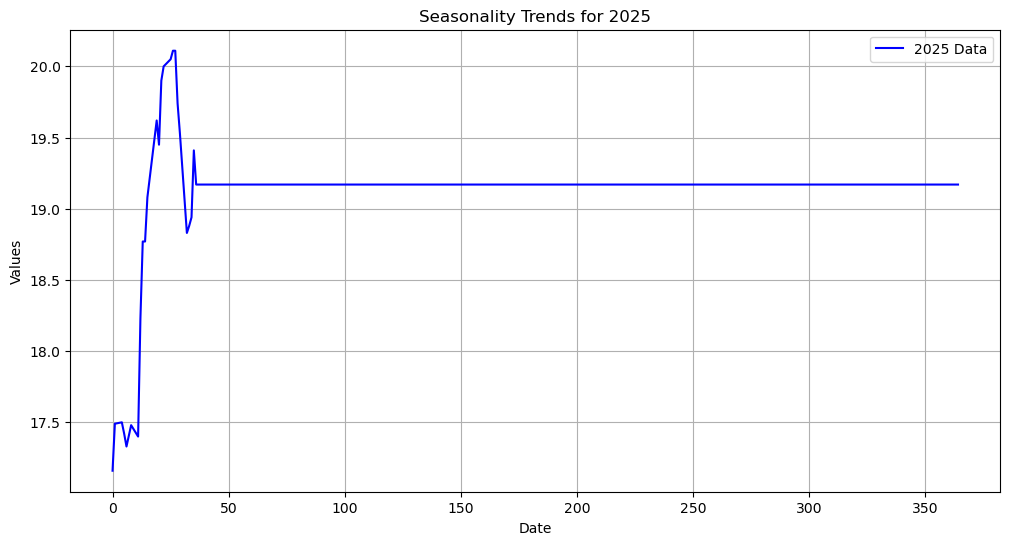

In [30]:
# Step 2: Rename the Date column if needed
if df.columns[0] != "Date":
    df.rename(columns={df.columns[0]: "Date"}, inplace=True)

# Step 3: Convert Date column to datetime
if "Date" in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
else:
    print("Date column not found. Verify the structure of the dataset.")
    exit()
print("Available Columns:")
print(df.columns)

df = pd.read_csv(data_file, skiprows=2, header=0)
print("Columns After Reloading:")
print(df.columns)

print("2025 Column Data Preview:")
print(df['2025'].head())  # Check the first few rows of the column

print("\nNon-NaN Count in 2025 Column:")
print(df['2025'].count())  # Count the number of valid (non-NaN) entries

df['2025'] = df['2025'].interpolate(method='linear')  # Linearly interpolate missing values
print("\nNon-NaN Count After Interpolation:")
print(df['2025'].count())  # Ensure the count increases after interpolation

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['2025'], label='2025 Data', color='blue')

plt.title('Seasonality Trends for 2025')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()



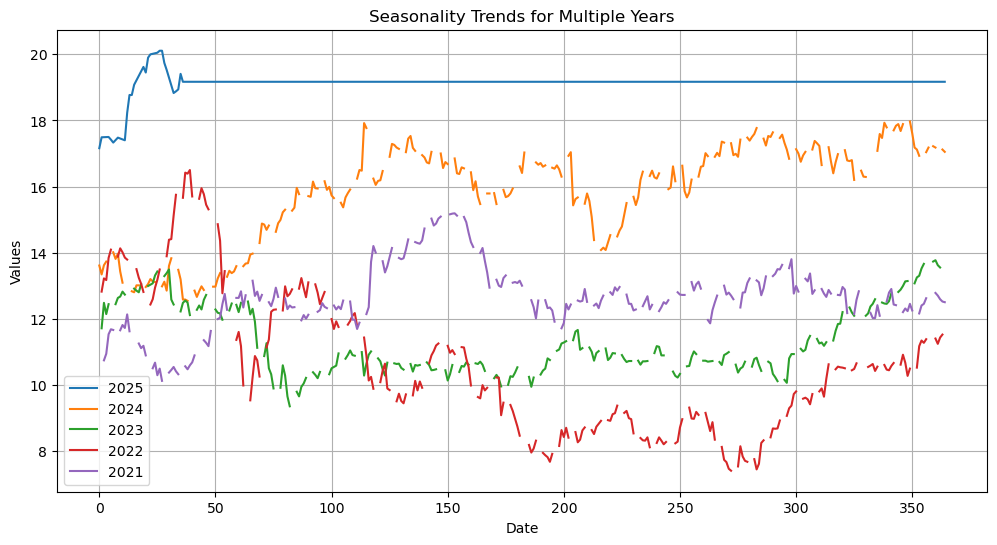

In [31]:
plt.figure(figsize=(12, 6))
for year in ['2025', '2024', '2023', '2022', '2021']:
    if year in df.columns:
        plt.plot(df.index, df[year], label=year)

plt.title('Seasonality Trends for Multiple Years')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


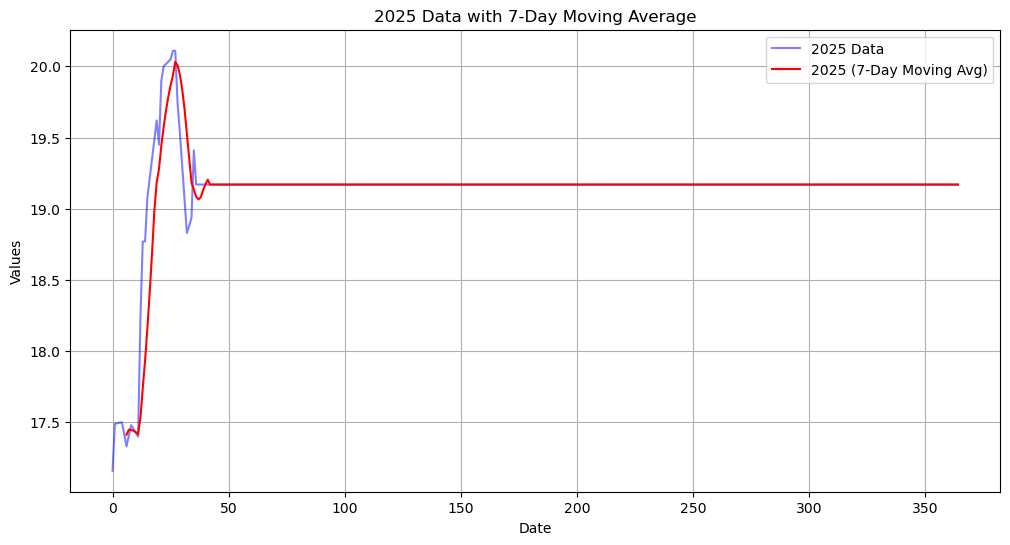

In [32]:
# Step 1: Calculate a 7-day moving average for 2025
df['2025_MA7'] = df['2025'].rolling(window=7).mean()

# Step 2: Plot the original 2025 data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['2025'], label='2025 Data', alpha=0.5, color='blue')
plt.plot(df.index, df['2025_MA7'], label='2025 (7-Day Moving Avg)', color='red')

plt.title('2025 Data with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [42]:
import seaborn as sns

# Ensure the Date index is in datetime format
df.index = pd.to_datetime(df.index, errors='coerce')

# Step 1: Extract Month from the Date index
df['Month'] = df.index.month
print("Historical Average Column Data:")
print(df['Historical Average'].head())

print("\nNumber of Non-NaN Entries in Historical Average:")
print(df['Historical Average'].count())

# Generate a sequential Date column starting from 2025-01-01

# Regenerate a sequential Date column starting from 2025-01-01
df['Date'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

# Set the new Date column as the index
df.set_index('Date', inplace=True)

# Confirm the updated index
print("Updated Date Index:")
print(df.index)



Historical Average Column Data:
Date
2025-01-01        NaN
2025-01-02        NaN
2025-01-03    15.2119
2025-01-04    14.9060
2025-01-05    14.9855
Name: Historical Average, dtype: float64

Number of Non-NaN Entries in Historical Average:
361
Updated Date Index:
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)


In [45]:
df['Month'] = df.index.month
pivot_data = df.pivot_table(index='Month', values='Historical Average', aggfunc='mean')

print("Pivot Table Data:")
print(pivot_data)


Pivot Table Data:
       Historical Average
Month                    
1               14.851597
2               14.772982
3               14.386352
4               14.333770
5               14.269442
6               13.723777
7               13.709390
8               13.367613
9               13.095777
10              13.210845
11              13.486937
12              13.804172


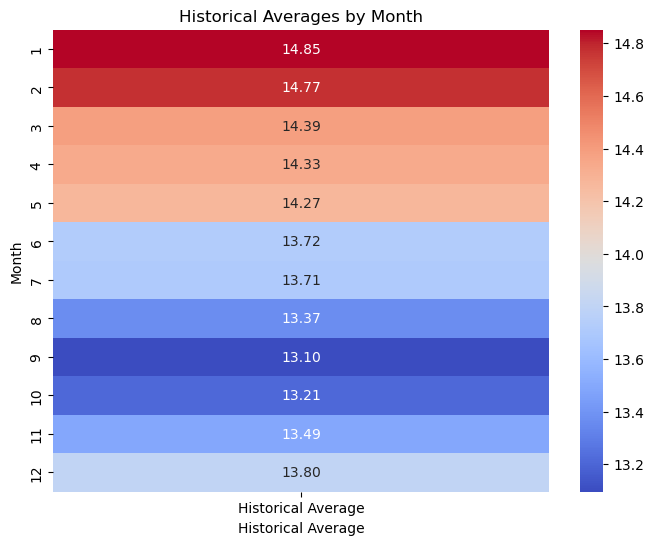

In [46]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Historical Averages by Month')
plt.xlabel('Historical Average')
plt.ylabel('Month')
plt.show()


In [48]:
print("Pivot Table Data:")
print(pivot_data)



Pivot Table Data:
       Historical Average
Month                    
1               14.851597
2               14.772982
3               14.386352
4               14.333770
5               14.269442
6               13.723777
7               13.709390
8               13.367613
9               13.095777
10              13.210845
11              13.486937
12              13.804172


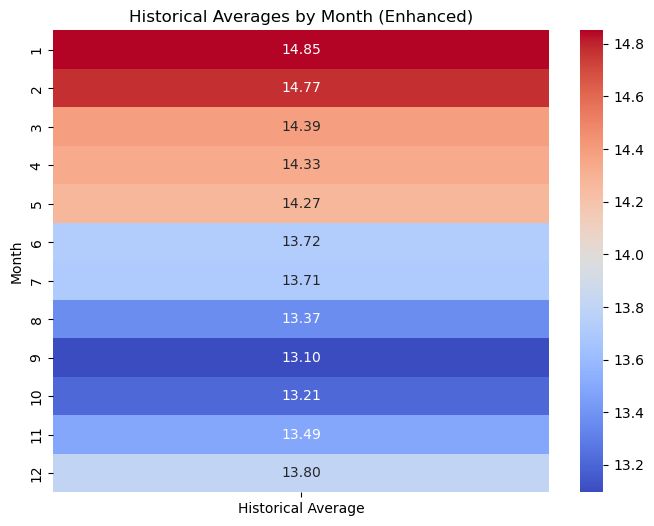

In [50]:
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Historical Averages by Month (Enhanced)')
plt.xlabel('')  # Remove the duplicate label
plt.ylabel('Month')  # Keep the y-axis label
plt.show()



Pivot Table Data:
        Historical Average
Month                    
1               14.851597
2               14.772982
3               14.386352
4               14.333770
5               14.269442
6               13.723777
7               13.709390
8               13.367613
9               13.095777
10              13.210845
11              13.486937
12              13.804172
Pivot Table with Percentage Change:
        Historical Average  Monthly % Change
Month                                      
1               14.851597               NaN
2               14.772982         -0.529333
3               14.386352         -2.617146
4               14.333770         -0.365497
5               14.269442         -0.448787
6               13.723777         -3.824013
7               13.709390         -0.104828
8               13.367613         -2.493017
9               13.095777         -2.033544
10              13.210845          0.878669
11              13.486937          2.089885
12      

/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_18927/3669069654.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


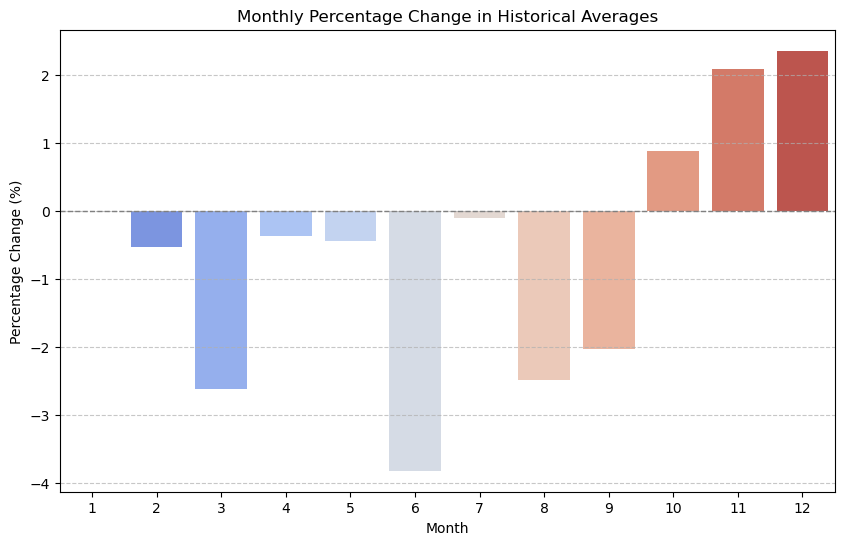

In [56]:
# Recreate the pivot table
pivot_table = df.copy()
pivot_table['Month'] = pivot_table.index.month  # Extract the month from the index
pivot_table = pivot_table.pivot_table(
    index='Month', 
    values='Historical Average', 
    aggfunc='mean'
)
print("Pivot Table Data:\n", pivot_table)

# Step 1: Calculate Monthly Percentage Change
pivot_table['Monthly % Change'] = pivot_table['Historical Average'].pct_change() * 100
print("Pivot Table with Percentage Change:\n", pivot_table)

# Step 2: Bar Chart for Percentage Change
plt.figure(figsize=(10, 6))
sns.barplot(
    x=pivot_table.index,
    y=pivot_table['Monthly % Change'],
    palette="coolwarm"
)
plt.title("Monthly Percentage Change in Historical Averages")
plt.xlabel("Month")
plt.ylabel("Percentage Change (%)")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


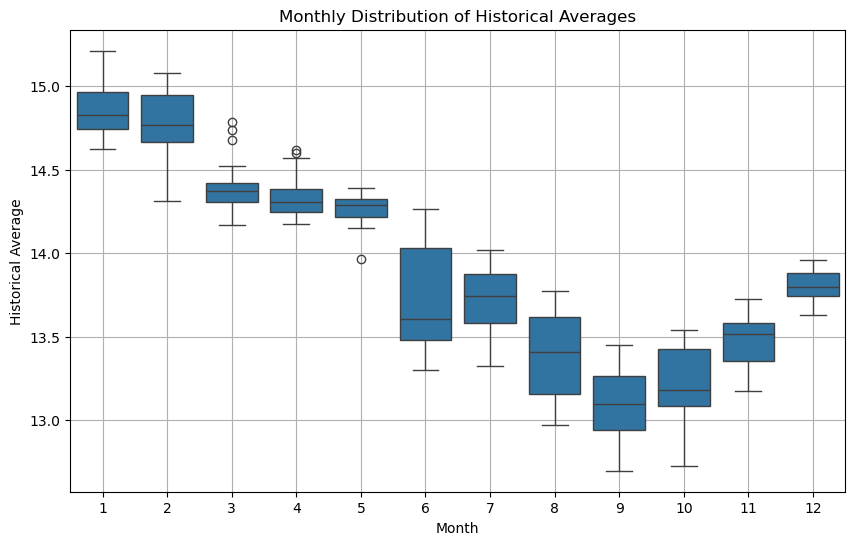

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Historical Average', data=df)
plt.title('Monthly Distribution of Historical Averages')
plt.xlabel('Month')
plt.ylabel('Historical Average')
plt.grid()
plt.show()


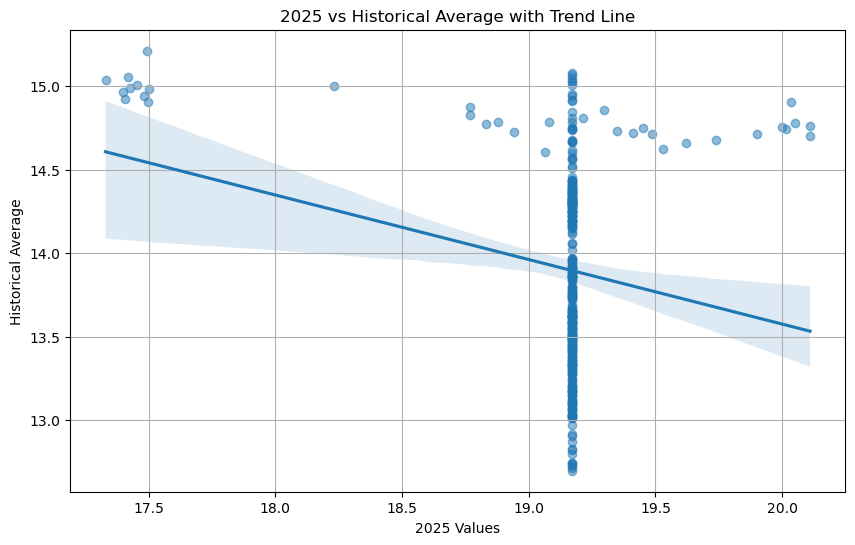

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(x='2025', y='Historical Average', data=df, scatter_kws={'alpha':0.5})
plt.title('2025 vs Historical Average with Trend Line')
plt.xlabel('2025 Values')
plt.ylabel('Historical Average')
plt.grid()
plt.show()


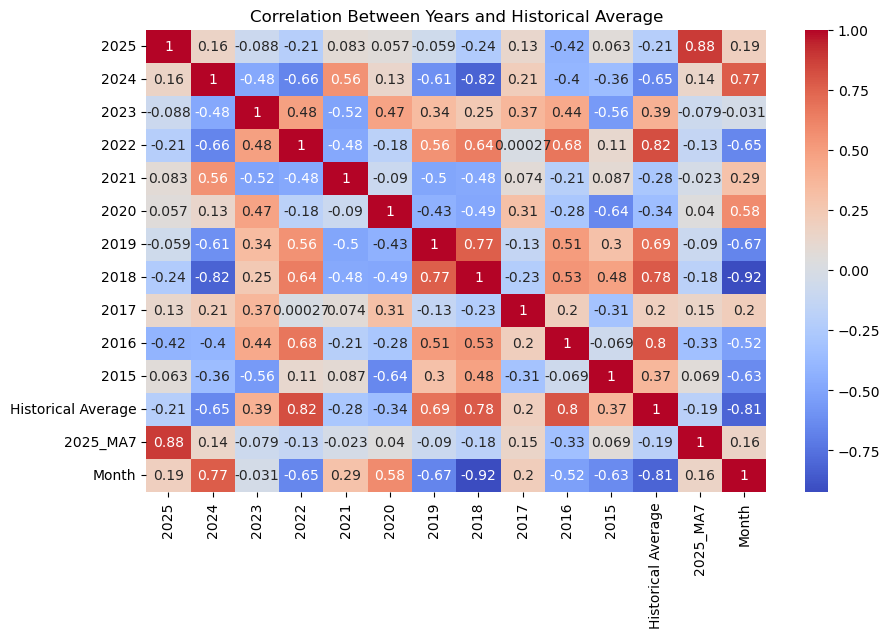

In [60]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Years and Historical Average')
plt.show()


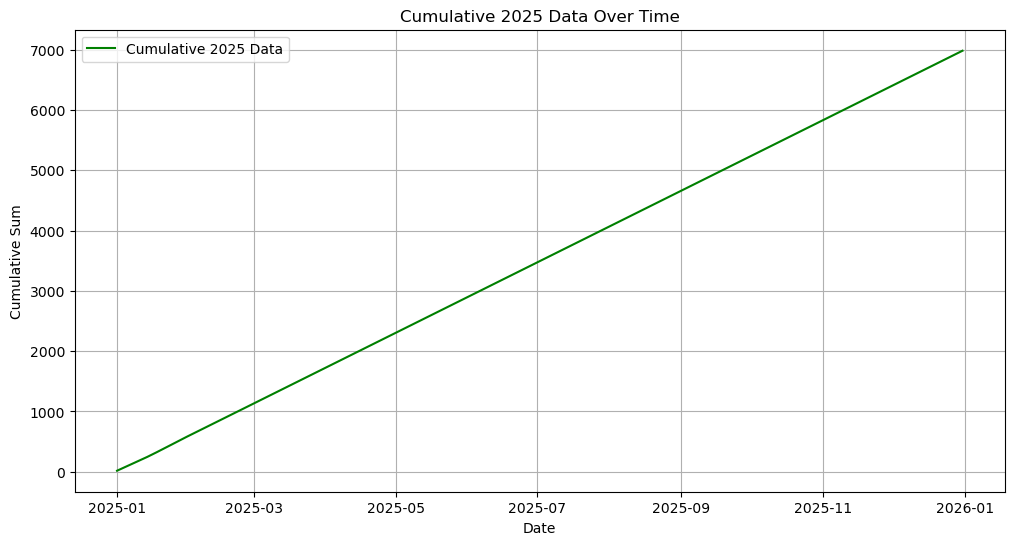

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['2025'].cumsum(), label='Cumulative 2025 Data', color='green')
plt.title('Cumulative 2025 Data Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid()
plt.show()


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_18927/3931600401.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set3')(range(len(monthly_totals)))


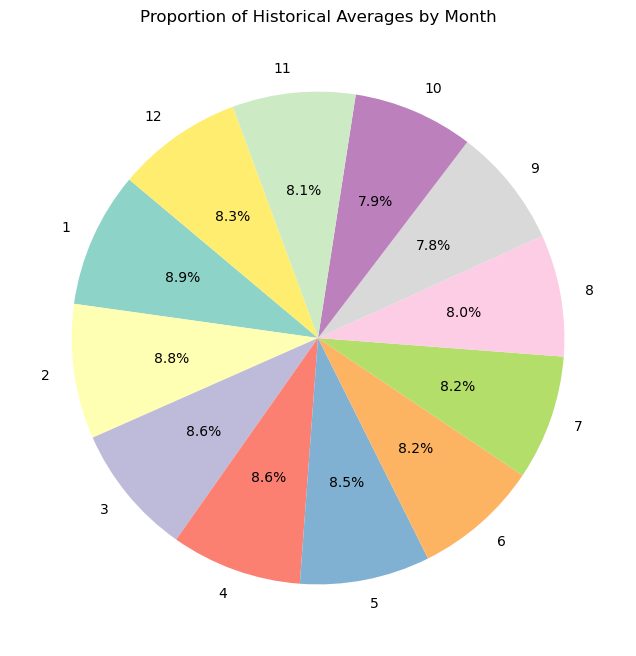

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Get a colormap and generate colors for the slices
colors = cm.get_cmap('Set3')(range(len(monthly_totals)))

# Step 2: Create the pie chart without the 'cmap' argument
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_totals,
    labels=monthly_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors  # Use the generated colors
)
plt.title('Proportion of Historical Averages by Month')
plt.show()


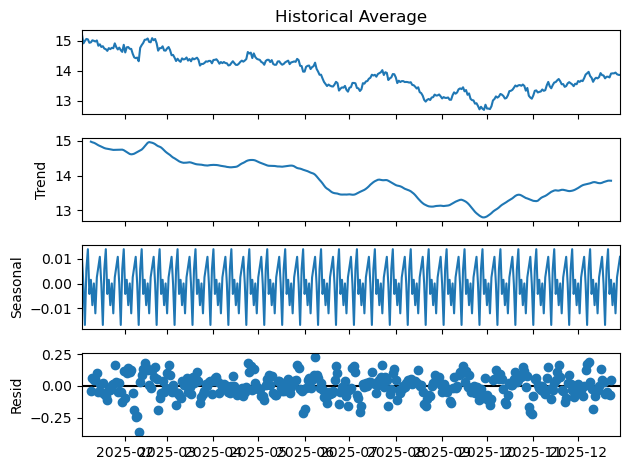

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Historical Average'].dropna(), model='additive', period=12)
result.plot()
plt.show()


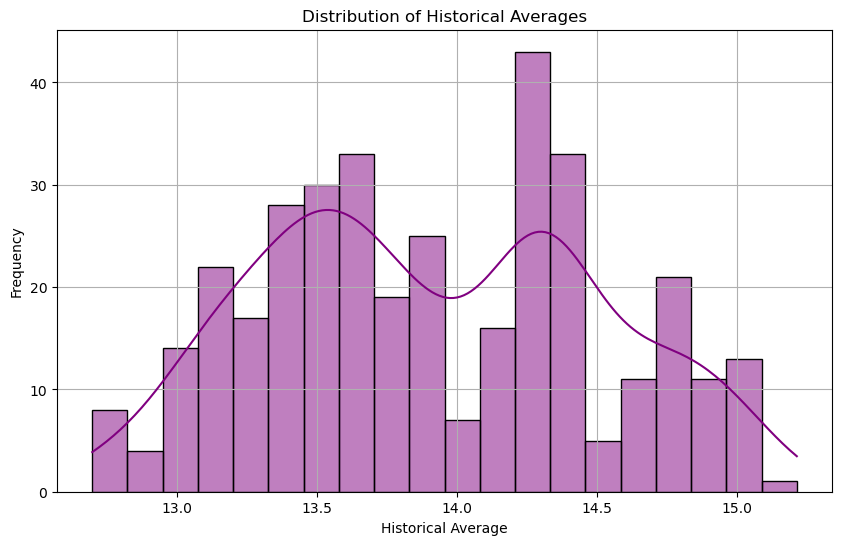

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Historical Average'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribution of Historical Averages')
plt.xlabel('Historical Average')
plt.ylabel('Frequency')
plt.grid()
plt.show()


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_18927/2623430759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Historical Average', data=boxplot_data, palette="Set3")


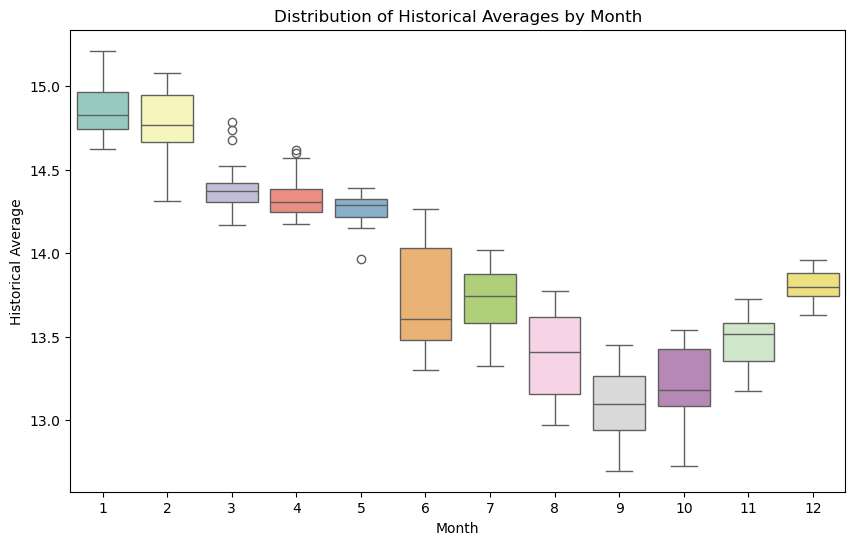

In [67]:
import seaborn as sns

# Create a DataFrame with month and historical averages
boxplot_data = df[['Historical Average']].copy()
boxplot_data['Month'] = df.index.month

# Generate the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Historical Average', data=boxplot_data, palette="Set3")
plt.title('Distribution of Historical Averages by Month')
plt.xlabel('Month')
plt.ylabel('Historical Average')
plt.show()


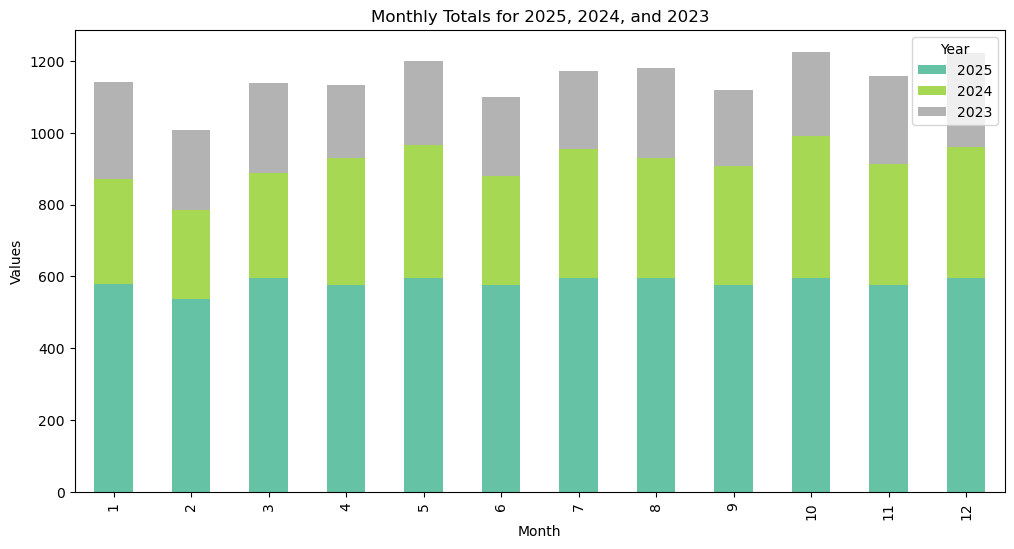

In [68]:
# Step 1: Reshape data to group by months
stacked_data = df[['2025', '2024', '2023']].copy()
stacked_data['Month'] = df.index.month
stacked_pivot = stacked_data.groupby('Month').sum()

# Step 2: Plot the stacked bar chart
stacked_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)
plt.title('Monthly Totals for 2025, 2024, and 2023')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title='Year')
plt.show()


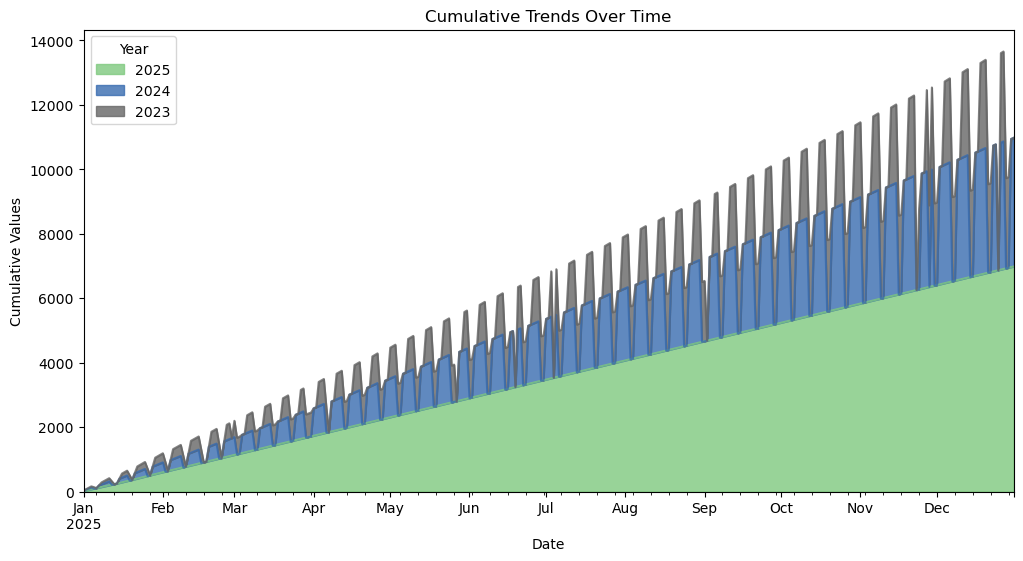

In [69]:
# Calculate cumulative sums for the years
cumulative_data = df[['2025', '2024', '2023']].cumsum()

# Plot the area chart
cumulative_data.plot(
    figsize=(12, 6),
    kind='area',
    alpha=0.8,
    colormap='Accent'
)
plt.title('Cumulative Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Values')
plt.legend(title='Year')
plt.show()


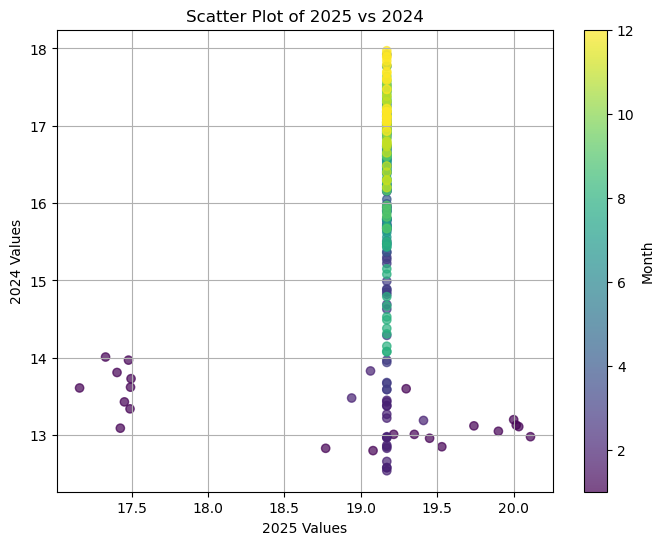

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(df['2025'], df['2024'], alpha=0.7, c=df.index.month, cmap='viridis')
plt.title('Scatter Plot of 2025 vs 2024')
plt.xlabel('2025 Values')
plt.ylabel('2024 Values')
plt.colorbar(label='Month')
plt.grid(True)
plt.show()


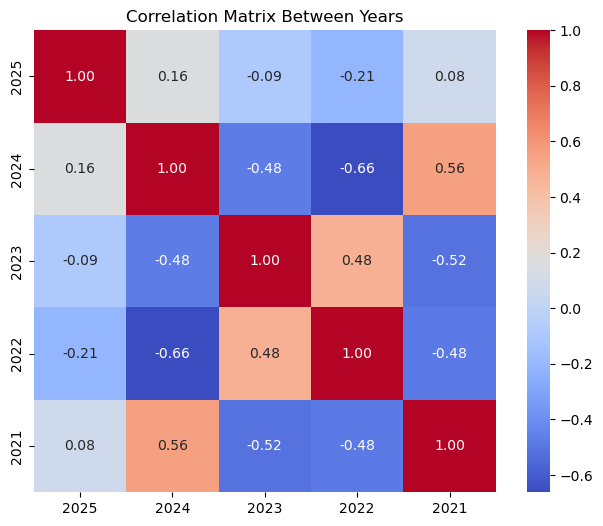

In [71]:
# Calculate correlations
correlation_matrix = df[['2025', '2024', '2023', '2022', '2021']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Between Years')
plt.show()
